# DATA EXPLORE

In [1]:
import os
print(os.getcwd())

## 1 load data

In [2]:
import pandas as pd

df = pd.read_csv('./data/train.csv', encoding='latin-1', low_memory=False)
df = df.iloc[:,0:8]

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.iloc[0, :]["comment_text"]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

## 2 clear data

In [5]:
df = df.dropna()
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
# delete the lines whose classes are not number
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')
delete_indexes = []
for index, row in df.iterrows():
    for c in columns:
        try:
            float(row[c])
        except:
            delete_indexes.append(int(index))
            break
         
delete_i = df.loc[delete_indexes, :].index
delete_i

Int64Index([   625,    653,    752,    995,   1056,   1138,   1144,   1337,
              1513,   1577,
            ...
            157644, 157688, 157988, 158289, 158600, 158699, 158775, 158821,
            158882, 158905],
           dtype='int64', length=996)

In [7]:
print(df.shape)
df = df.drop(delete_i)
print(df.shape)

(158596, 8)
(157600, 8)


## 3 add more statistical features

In [8]:
# Length of the comment - my initial assumption is that angry people write short messages
df['total_length'] = df['comment_text'].apply(len)
# Number of capitals - observation was many toxic comments being ALL CAPS
df['capitals'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
# Proportion of capitals - see previous
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['total_length']),axis=1)
# Number of exclamation marks - i observed several toxic comments with multiple exclamation marks
df['num_exclamation_marks'] = df['comment_text'].apply(lambda comment: comment.count('!'))
# Number of question marks - assumption that angry people might not use question marks
df['num_question_marks'] = df['comment_text'].apply(lambda comment: comment.count('?'))
# Number of punctuation symbols - assumption that angry people might not use punctuation
df['num_punctuation'] = df['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
# Number of symbols - assumtion that words like fck or $# or sh*t mean more symbols in foul language (Thx for tip!)
df['num_symbols'] = df['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
# Number of words - angry people might write short messages?
df['num_words'] = df['comment_text'].apply(lambda comment: len(comment.split()))
# Number of unique words - observation that angry comments are sometimes repeated many times
df['num_unique_words'] = df['comment_text'].apply(lambda comment: len(set(w for w in comment.split())))
# Proportion of unique words - see previous
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
# Number of (happy) smilies - Angry people wouldn't use happy smilies, right?
df['num_smilies'] = df['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [9]:
df.head(100)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,0.064394,0,1,6,0,43,41,0.953488,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,0.071429,1,0,5,0,17,17,1.000000,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,0.017167,0,0,4,0,42,39,0.928571,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,0.017685,0,0,6,0,113,82,0.725664,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,0.029851,0,1,3,0,13,13,1.000000,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,67,3,0.044776,0,0,2,0,14,13,0.928571,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,37,0.840909,0,0,0,0,8,8,1.000000,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,4,0.034783,0,0,3,0,20,20,1.000000,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,7,0.014831,0,1,9,0,83,70,0.843373,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70,2,0.028571,0,0,0,0,12,12,1.000000,0


## 4 correlation between added features and orig data
this should be an indication of whether a model could use these features

In [10]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
            'num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words',
            'words_vs_unique', 'num_smilies', 'num_symbols')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

In [11]:
df.dtypes

id                        object
comment_text              object
toxic                     object
severe_toxic              object
obscene                   object
threat                    object
insult                    object
identity_hate             object
total_length               int64
capitals                   int64
caps_vs_length           float64
num_exclamation_marks      int64
num_question_marks         int64
num_punctuation            int64
num_symbols                int64
num_words                  int64
num_unique_words           int64
words_vs_unique          float64
num_smilies                int64
dtype: object

In [12]:
columns = list(columns)
df[columns] = df[columns].apply(pd.to_numeric)

In [13]:
df.dtypes

id                        object
comment_text              object
toxic                      int64
severe_toxic               int64
obscene                    int64
threat                     int64
insult                     int64
identity_hate              int64
total_length               int64
capitals                   int64
caps_vs_length           float64
num_exclamation_marks      int64
num_question_marks         int64
num_punctuation            int64
num_symbols                int64
num_words                  int64
num_unique_words           int64
words_vs_unique          float64
num_smilies                int64
dtype: object

In [14]:
rows = [{c:df[f].corr(df[c]) for c in columns} for f in features]
# pandas.DataFrame.corr:
# Compute pairwise correlation of columns, excluding NA/null values.
df_correlations = pd.DataFrame(rows, index=features)
df_correlations

,identity_hate,insult,obscene,severe_toxic,threat,toxic
total_length,-0.013775,-0.045225,-0.043419,0.010402,-0.007681,-0.054896
capitals,0.053791,0.076104,0.081859,0.144159,0.034051,0.090524
caps_vs_length,0.093757,0.169596,0.181842,0.169623,0.055399,0.219484
num_exclamation_marks,0.005810,0.027012,0.024300,0.060722,0.034419,0.037353
num_question_marks,-0.005144,-0.007292,-0.006004,-0.009166,-0.005604,0.008849
num_punctuation,-0.021768,-0.049669,-0.044597,-0.010595,-0.003439,-0.057133
num_words,-0.014600,-0.043732,-0.042663,0.008819,-0.006452,-0.052868
num_unique_words,-0.033097,-0.081343,-0.081719,-0.048501,-0.020176,-0.096664
words_vs_unique,0.010476,0.043089,0.042454,-0.027720,-0.004526,0.056160
num_smilies,0.001267,-0.004312,-0.003150,-0.002541,-0.001487,-0.003909


In [34]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

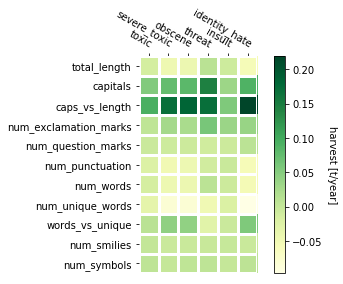

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(features)))
im, cbar = heatmap(df_correlations, features, columns, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.show()

Conclusion:
important features:
- Number of capitals
- Proportion of capitals
- Proportion of unique words
- Number of exclamation marks

## 5 data explore

![](https://image.jiqizhixin.com/uploads/editor/ff579521-fad5-4bec-be2e-0284fc393cfa/1540797162506.png)

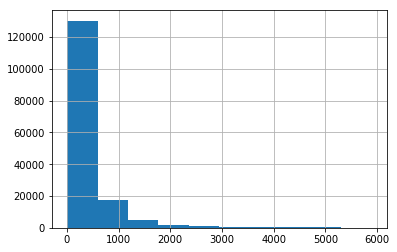

In [40]:
%matplotlib inline

df.total_length.hist()